In [4]:
import numpy as np
from random import random

X = np.array([random() for _ in range(10)])

# cumulative sum threshold
limit = 10 / 4.0

y = np.array([0 if x < limit else 1 for x in np.cumsum(X)])

In [5]:
X

array([ 0.72681964,  0.76105544,  0.76162097,  0.7073244 ,  0.02398864,
        0.87048179,  0.71483979,  0.60569223,  0.82236803,  0.90163669])

In [6]:
y

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [11]:
# create a sequence classification instance
def get_sequence(n_timesteps):
    X = np.array([random() for _ in range(n_timesteps)])
    limit = n_timesteps / 4.0
    y = np.array([0 if x < limit else 1 for x in np.cumsum(X)])
    return X, y

In [12]:
X, y = get_sequence(10)
print(X)
print(y)

[ 0.28867207  0.41501241  0.78473673  0.43219399  0.51291057  0.25649378
  0.24320337  0.22881727  0.01179948  0.05949883]
[0 0 0 0 0 1 1 1 1 1]


In [13]:
# create multiple samples of cumulative sum sequences
def get_sequences(n_sequences, n_timesteps):
    seqX, seqY = list(), list()
    for _ in range(n_sequences):
        X, y = get_sequence(n_timesteps)
        seqX.append(X)
        seqY.append(y)
    seqX = np.array(seqX).reshape(n_sequences, n_timesteps, 1)
    seqY = np.array(seqY).reshape(n_sequences, n_timesteps, 1)
    return seqX, seqY

In [15]:
X, y = get_sequences(20, 10)
print(X.shape)
print(y.shape)

(20, 10, 1)
(20, 10, 1)


In [37]:
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, TimeDistributed, Dense

n_timesteps = 10

# define LSTM
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(n_timesteps, 1)))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_9 (Bidirection (None, 10, 100)           20800     
_________________________________________________________________
time_distributed_6 (TimeDist (None, 10, 1)             101       
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________


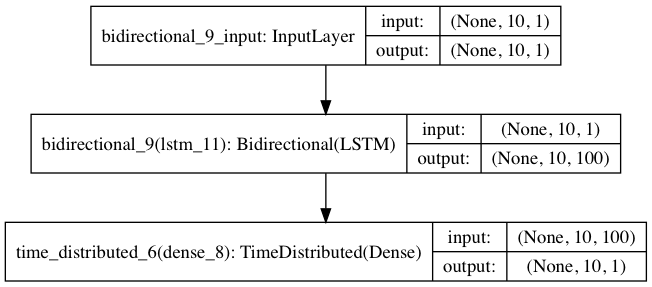

In [38]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png')

In [39]:
# train LSTM
X, y = get_sequences(50000, n_timesteps)
model.fit(X, y, epochs=1, batch_size=10)

Epoch 1/1
50000/50000 [==============================] - 189s - loss: 0.0513 - acc: 0.9816   


In [40]:
# evaluate LSTM
X, y = get_sequences(100, n_timesteps)
loss, acc = model.evaluate(X, y, verbose=0)
print('Loss: %f, Accuracy: %f' % (loss, acc * 100))

Loss: 0.018020, Accuracy: 99.699999


In [43]:
# make predictions
for _ in range(10):
    X, y = get_sequences(1, n_timesteps)
    yhat = model.predict_classes(X, verbose=0)
    exp, pred = y.reshape(n_timesteps), yhat.reshape(n_timesteps)
    print('y=%s, yhat=%s, correct=%s' % (exp, pred, np.array_equal(exp, pred)))

y=[0 0 0 0 0 1 1 1 1 1], yhat=[0 0 0 0 0 1 1 1 1 1], correct=True
y=[0 0 0 0 0 1 1 1 1 1], yhat=[0 0 0 0 0 1 1 1 1 1], correct=True
y=[0 0 0 0 1 1 1 1 1 1], yhat=[0 0 0 0 1 1 1 1 1 1], correct=True
y=[0 0 0 0 0 1 1 1 1 1], yhat=[0 0 0 0 0 1 1 1 1 1], correct=True
y=[0 0 0 0 1 1 1 1 1 1], yhat=[0 0 0 0 1 1 1 1 1 1], correct=True
y=[0 0 0 0 0 0 1 1 1 1], yhat=[0 0 0 0 0 0 1 1 1 1], correct=True
y=[0 0 0 0 0 1 1 1 1 1], yhat=[0 0 0 0 0 1 1 1 1 1], correct=True
y=[0 0 0 0 1 1 1 1 1 1], yhat=[0 0 0 0 1 1 1 1 1 1], correct=True
y=[0 0 0 0 1 1 1 1 1 1], yhat=[0 0 0 0 1 1 1 1 1 1], correct=True
y=[0 0 0 0 0 1 1 1 1 1], yhat=[0 0 0 0 0 1 1 1 1 1], correct=True
